# Sentiment Analysis Project
This notebook loads data, performs EDA, trains models, and evaluates them.

In [13]:

import pandas as pd
from utils import *
from sklearn.feature_extraction.text import CountVectorizer
import joblib


## Load Data

In [14]:
columns = ['tweet_id', 'topic', 'sentiment', 'tweet_text'] 

data_path = 'twitter_training.csv'
df = pd.read_csv(data_path, header=None, names=columns)
df_test = pd.read_csv('twitter_validation.csv', header=None, names=columns)

df.head()

,tweet_id,topic,sentiment,tweet_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## EDA and Preprocessing Data

In [15]:
# Overview of the dataset
overview(df)
overview(df_test)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    74682 non-null  int64 
 1   topic       74682 non-null  object
 2   sentiment   74682 non-null  object
 3   tweet_text  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
--------------------------------------------------
           Metric  Value
0            Rows  74682
1         Columns      4
2  Missing Values    686
3  Duplicate Rows   2700
----------------------------------------------------------------------------------------------------
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1000 non-null   int64 
 1   topic       1000 non-null   object
 2   sentiment   10

In [16]:

df.dropna(inplace=True) # Drop rows with missing values
df.drop_duplicates(subset='tweet_id', keep='first', inplace=True) # Drop duplicates

#### Clean tweets

In [17]:
df['cleaned_text'] = df['tweet_text'].apply(clean_text) # Apply the clear_text function to the tweet_text column
df_test['cleaned_text'] = df_test['tweet_text'].apply(clean_text) # Apply the clear_text function to the tweet_text column

#### Explore Dataset

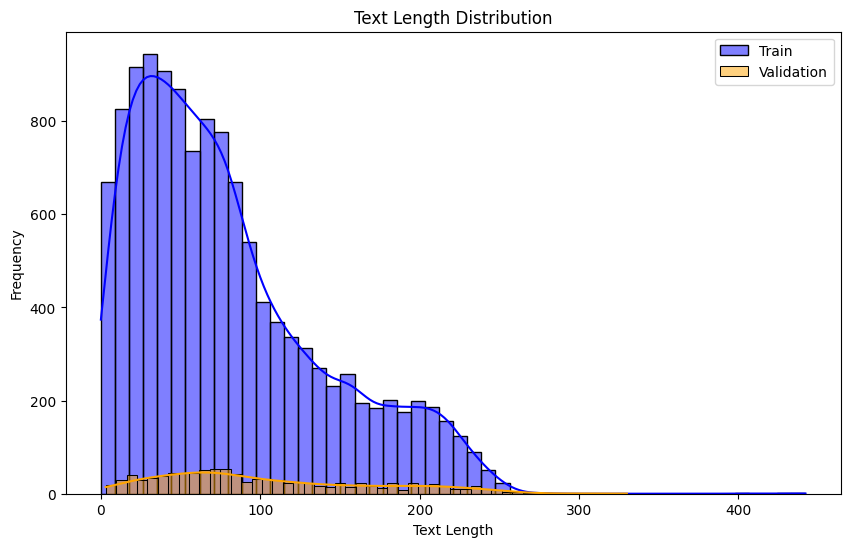

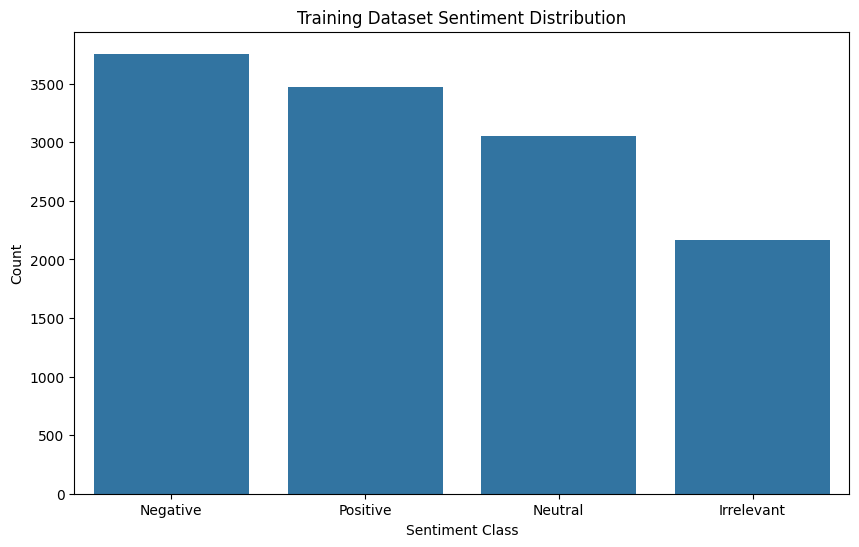

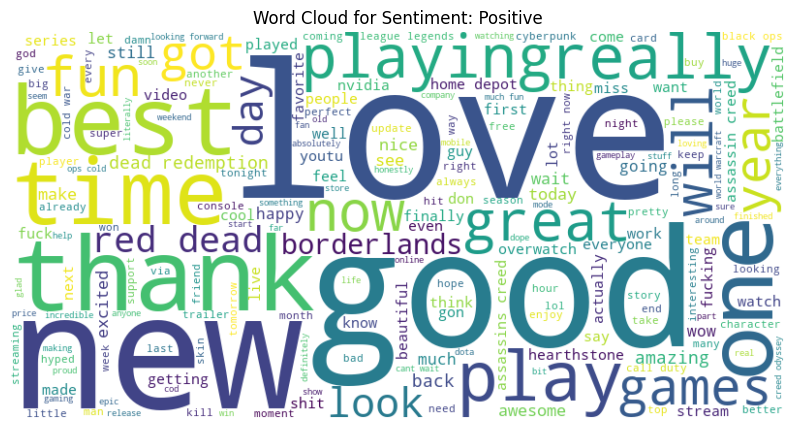

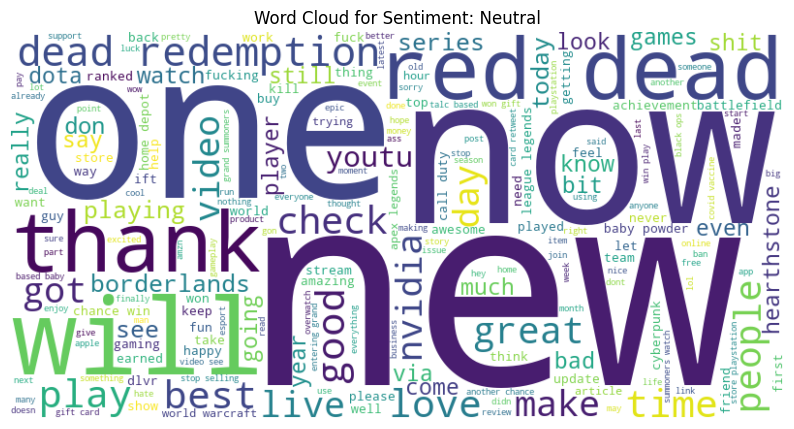

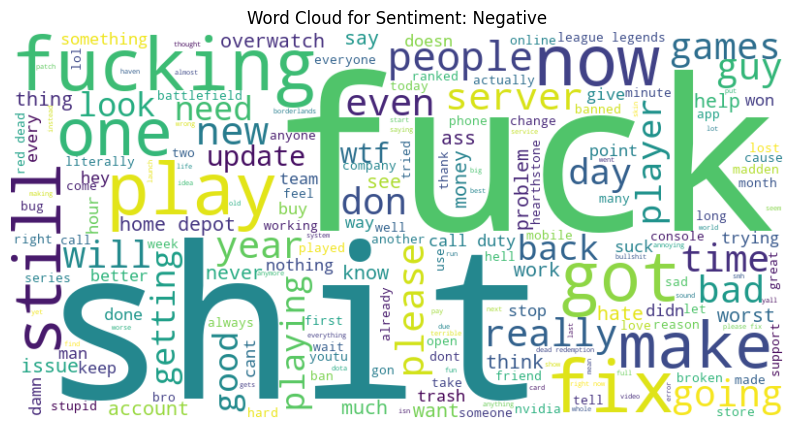

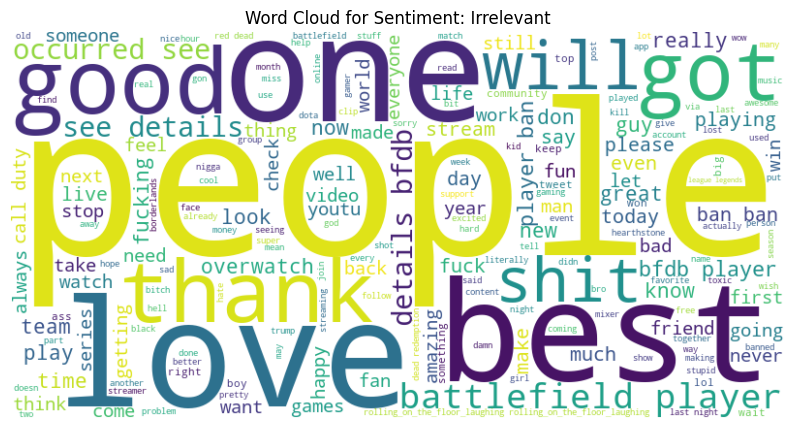

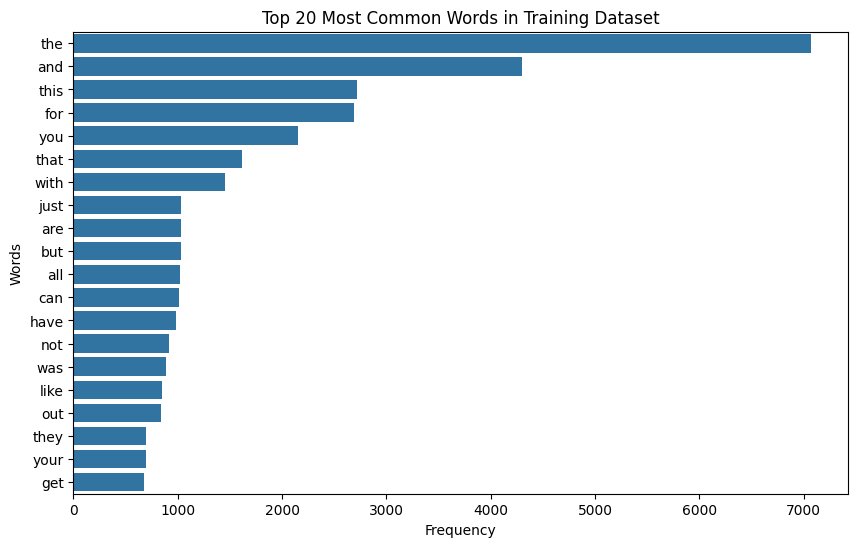

In [18]:

text_length_distribution(df,df_test)
classes_distribution(df)
word_cloud(df)
common_words(df)

#### Encode labels

In [19]:
df['sentiment'] = df['sentiment'].map({'Negative':0,'Positive':1})  # Encode the sentiment column
df_test['sentiment'] = df_test['sentiment'].map({'Negative':0,'Positive':1})  # Encode the sentiment column
df.dropna(inplace=True)  # Drop missing values
df_test.dropna(inplace=True)  # Drop missing values

#### Vectorize Data

In [20]:
vec = CountVectorizer()

X_train = vectorize_train_text(df['cleaned_text'], vec) 
X_test = vectorize_test_text(df_test['cleaned_text']) 

vectorizer = joblib.load('vectorizer.pkl')

y_train = df['sentiment']
y_test = df_test['sentiment']

## Train Models

In [21]:
# Train Random Forest
print("Training Random Forest...")
rf_model, rf_params, rf_score = train_random_forest(X_train, y_train)
print(f"Best Random Forest Params: {rf_params}, Accuracy: {rf_score}")

# Train SVM
print("Training SVM...")
svm_model, svm_params, svm_score = train_svm(X_train, y_train)
print(f"Best SVM Params: {svm_params}, Accuracy: {svm_score}")


Training Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=   4.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   4.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   4.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   8.5s
[CV] END ...................max_depth=None, n_estimators=100; total time=   8.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   9.1s
[CV] END ...................max_depth=None, n_estimators=150; total time=  13.4s
[CV] END ...................max_depth=None, n_estimators=150; total time=  12.3s
[CV] END ...................max_depth=None, n_estimators=150; total time=  12.8s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.2s
[CV] END .............

## Evaluate Models

In [22]:

# Evaluate models
rf_accuracy = rf_model.score(X_test, y_test)
svm_accuracy = svm_model.score(X_test, y_test)
print(f"Random Forest Test Accuracy: {rf_accuracy}")
print(f"SVM Test Accuracy: {svm_accuracy}")


Random Forest Test Accuracy: 0.996316758747698
SVM Test Accuracy: 0.9134438305709024


## Predict Sentiment for a Sample Sentence

In [23]:

# Predict a single sentence
test_sentence = 'I love this movie!'
rf_prediction = predict_sentiment(test_sentence, rf_model, vectorizer)
svm_prediction = predict_sentiment(test_sentence, svm_model, vectorizer)
print(f"RF Prediction: {rf_prediction}\nSVM Prediction: {svm_prediction}")


RF Prediction: Neutral
SVM Prediction: Neutral


## Save Model

In [27]:
save_model(rf_model, 'rf_model.pkl')

Model saved to rf_model.pkl
